<a href="https://colab.research.google.com/github/ChoiSenn/Study/blob/main/data_analysis/exercise/ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 분석과 머신러닝**
## 2022-03-31 통계 데이터와 시본 라이브러리
<br>

---

<br>

### 1. 데이터 사이의 관련성

<br>

- 변수 : 키, 몸무게, 연간 소득과 같이 변하는 양을 표현한 것.
- 상관관계 : 두 개의 변수들이 함께 변화하는 관계.
- 상관계수 : 변수들 사이의 상관관계의 정도를 나타내는 수치.
- 인과관계 : 한 변수가 다른 변수의 직접적인 원인이 되는 것.
- 상호관계 : 두 변수가 서로 영향을 주는 것.

<br>

"아이스크림 판매량과 익사 사고 건수는 상관관계가 매우 높다. 그러나 인과성을 찾기는 어렵다."

<br>

상관계수가 두 변수들 사이의 선형적인 관계만을 측정하는 한계가 있다.

<br>

ex) "매일 과일을 먹는 사람이 그렇지 않은 사람에 비하여 건강하다"는 주장에 대해
- 과일의 섭취량과 건강도는 상관관계가 있다.
- 과일의 섭취량과 건강도는 강한 인과관계가 있지는 않다.
- 건강에 대한 관심도와 과일 섭취량은 상관관계는 있지만 인과관계는 없다.

<br><br>


<br><br>

---

<br><br>

### 2. 상관계수를 구하고 시각화하기

<br>

넘파이의 corrcoef() 함수는 수학적으로 피어슨 상관계수를 계산하는 함수이다. corrcoef(x, y)를 입력값으로 넣어 x와 y 요소들의 상관관계를 계산한다.
<br><br>
피어슨 상관계수는 변수들 간의 관련성을 구하는 이변량 상관분석에서 보편적으로 이용되는 방법이다.
<br><br>
완전한 음의 상관관계일 경우 -1, 상관관계가 전혀 없을 때 0, 완전한 양의 상관관계를 가질 때 1이 된다.

<br>

In [4]:
import numpy as np

np.random.seed(85)  # 동일한 결과를 얻기 위해 시드 설정
x = np.arange(0, 10)  # 0~9를 생성
y1 = x * 2  # 0, 2, 4...16, 18을 생성
np.corrcoef(x, y1)  # 두 변수는 선형적인 상관관계를 가지므로 모든 성분 값이 1이다

array([[1., 1.],
       [1., 1.]])

In [6]:
x = np.arange(0, 10)  # 0~9를 생성
y2 = x ** 3  # x의 세제곱 값을 원소로 함
np.corrcoef(x, y2)  # x의 값이 증가하면 y2의 값도 증가하는 관계이므로 상관도는 비교적 높다.

array([[1.        , 0.90843373],
       [0.90843373, 1.        ]])

In [7]:
x = np.arange(0, 10)
y3 = np.random.randint(0, 100, size=10)  # 0~1000 사이 10개의 나눗 생성
np.corrcoef(x, y3)  # 난수는 특정한 규칙이 없는 수이므로 0에 가까운 상관관계가 나타난다.

array([[1.       , 0.5002124],
       [0.5002124, 1.       ]])

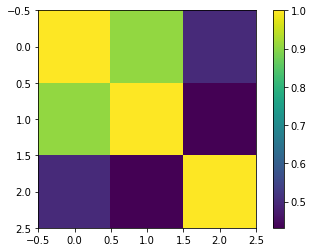

In [8]:
import matplotlib.pyplot as plt

result = np.corrcoef((x, y2, y3))  # 튜플 형태의 입력을 사용

plt.imshow(result)
plt.colorbar()  # 대각성분은 1이므로 노란색으로 나타나며 어두운 부분은 상관계수가 0에 가까운 부분이다.

<br><br>

---

<br><br>

### 3. 특성 간의 관련성을 알려주는 상관계수와 쌍 그래프

<br>

상관계수를 r이라고 하고 독립 변수를 각각 x, y 축에 배치한 데이터 시각화 그림이 있다면 그에 대한 설명은

- r의 부호가 +인 경우 (r > 0) : 두 변수 x, y의 값 중에서 한쪽이 증가할 때 한쪽이 증가하는 관계 == 양의 상관관계
- r의 부호가 -인 경우 (r < 0) : 두 변수 x, y의 값 중에서 한쪽이 증가할 때 한쪽은 감소하는 관계 == 음의 상관관계
- r = +1인 경우 : x, y가 서로 완벽한 선형 함수로 모델링이 가능할 경우 선형 함수의 기울기 값에 상관없이 상관계수는 1 == 완전한 상관관계
- r = 0인 경우 : 데이터의 분포가 랜덤할 경우 상관관계가 없으므로 상관계수는 0 == 상관관계 없음
- r = 0인 경우 : 상관계수는 선형적인 상관도만을 측정하므로 y = x^2와 같은 비선형적인 관계일 경우 0에 가까운 값을 가짐 == (선형)상관관계가 없음

<br>

쌍 그래프(pair plot) : 산점도를 이용하여 상관관계를 시각화한 후 r 값을 살펴볼 수 있다. 시본 라이브러리에서 판다스 데이터 형식의 자료값을 읽어서 데이터의 각 열 간의 상관도를 하나의 그림으로 그려준다.

<br>

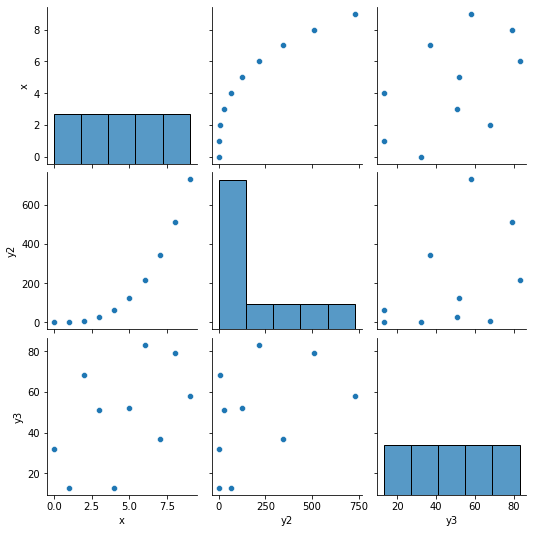

In [9]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'x': x, 'y2': y2, 'y3': y3})
sns.pairplot(df)   # 각 데이터의 분포와 히스토그램을 그려준다. 사선에 위치한 데이터들이 각각 대칭 형태를 띄고있다.

<br><br>

---

<br><br>

### 4. 시본 라이브러리

<br>

시본 라이브러리
- 맷플롯립을 기본으로 만들어졌으며, 더 높은 수준의 인터페이스를 제공하여 사용자들이 보다 쉽게 데이터를 분석하고 시각화할 수 있도록 해준다.
- 세련된 그림 라이브러리를 제공하고 있어, 고급스러운 그림을 쉽게 그릴 수 있다.
- 정교한 그래픽 제어를 할 때에는 맷플롯립과 함께 사용할 수 있다.
- 여러 종류의 데이터 집합을 제공하고 있다.

<br>

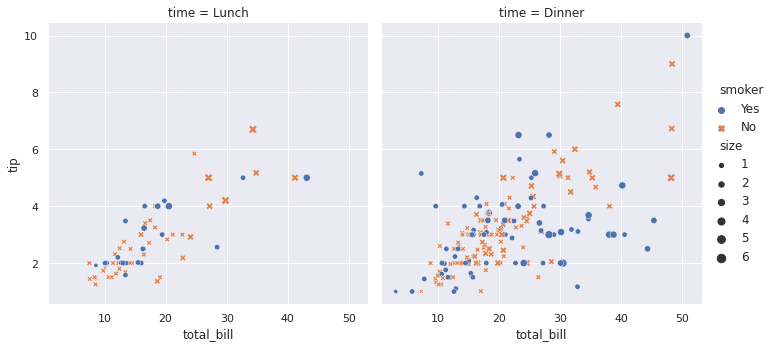

In [11]:
import seaborn as sns

sns.set_theme(style="darkgrid")  # 테마 설정
tips = sns.load_dataset("tips")  # 팁 데이터 가져오기

sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size")  # 식사비와 팁의 관계를 각각 산점도 그림으로 나타냄. 흡연/비흡연 고객을 구분함.

<br><br>

---

<br><br>

### 5. tips 데이터와 여러가지 시각화 방법

<br>

head() 메소드를 이용하여 판다스 데이터프레임 객체 내부의 값을 살펴볼 수 있다.

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.shape  # shape를 이용하여 전체 데이터의 개수를 살펴볼 수 있다. 244개의 데이터 셋이 7개의 속성을 가지는 것을 볼 수 있다.

(244, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


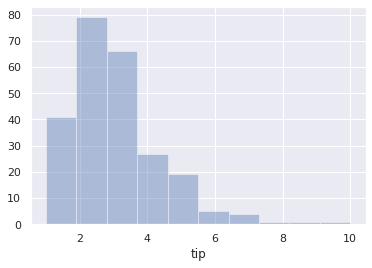

In [14]:
sns.distplot(tips['tip'], kde=False, bins=10)  # 히스토그램으로 고객들이 주로 어느 정도의 요금을 팁으로 주는지 분포를 살필 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


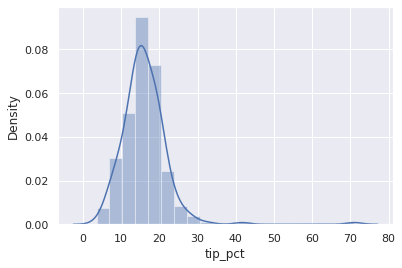

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']  # 팁 가격보다는 실제 식사 요금 대비 팁 비율이 더 의미있는 정보이므로 필드를 새로 만들고
sns.distplot(tips['tip_pct'], kde=True, bins=20)  # 히스토그램과 함께 kde=True를 이용하여 가우시안 터널 밀도 추정을 실선으로 그린다. 

<br><br>

---

<br><br>

### 6. 산점도 그래프로 관계를 상세히 나타내기

<br>

seborn의 relplot() 함수를 이용하 산점도 그림을 그린다. 
<br>
hue 키워드 인자 'smoker'는 smoker 열이 가질 수 있는 값 True, False를 서로 다른 색으로 표시해준다.
<br>
style은 이 열의 서로 다른 값에 대해서 스타일을 다르게 만들어준다.
<br>
size 키워드 인자를 'size'로 줄 경우, 서로 다른 크기의 표식으로 식사 인원을 한 화면에 나타내어 준다.

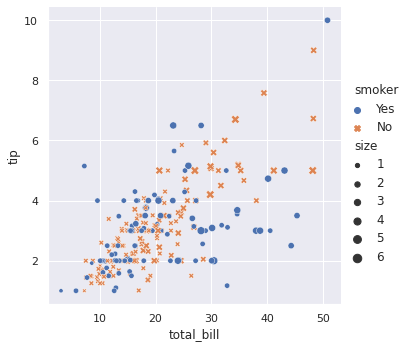

In [17]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'smoker', size = 'size')  # 여러 인자들을 이용하여 산점도 그래프 그리기. 

선형적인 상관관계가 있는지 여부를 직선을 그어 확인하는 방법으로 regplot() 함수가 있다.
<br><br>
axes 객체를 만들고 해당 객체에 x축, y축 레이블, 제목을 넣을 수 있다.
<br>
그래프를 확인해보면 데이터의 분포를 표현하는 직선이 나타나는 것을 볼 수 있다. 이를 선형 회귀 직선이라 한다.

Text(0.5, 1.0, 'Total Bill and Tip')

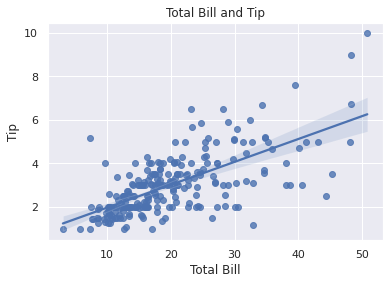

In [18]:
ax = sns.regplot(data = tips, x = 'total_bill', y = 'tip')
ax.set_xlabel('Total Bill')  # x축의 레이블
ax.set_ylabel('Tip')  # y축의 레이블
ax.set_title('Total Bill and Tip')  # 그림의 제목 설정

즉, 두 데이터의 상관관계를 가장 잘 표현하는 직선을 선형 회귀 직선이라 할 수 있다.

<br><br>

---

<br><br>

### 7. 변수 사이의 관계를 알아보기에 편리한 쌍 그래프

<br>

쌍 그래프는 여러 변수들 사이의 관계를 한 눈에 살펴보는데 편리하다.
<br><br>
두 변수 a와 b의 상관도가 높을 경우에 a가 증가할 경우, b도 증가하거나 감소하는 경향을 나타낸다. 반면 두 변수의 상관도가 낮을 경우 b는 랜덤한 분포를 가지거나 특정 값으로 몰리는 것을 볼 수 있다.

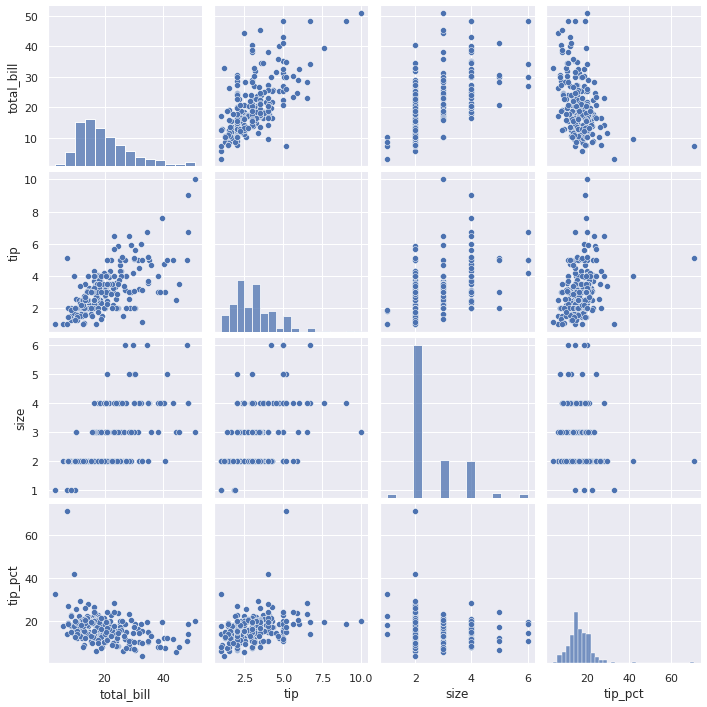

In [19]:
sns.pairplot(tips)  # tips 데이터프레임을 쌍 그래프로 표시한다

위 그래프를 살펴보면, 상관도의 모든 대각 성분은 1이므로 그림을 그리는 의미가 없다. 따라서 대각 성분은 각 변수 값의 분포를 나타내는 히스토그램으로 표현하고 있다.
<br><br>
그림 1행 2열의 데이터는 식사 요금과 팁의 상관관계를 나타내는데, 두 변수의 상관도는 높은 것을 볼 수 있다.
<br><br>
또한, 식사 인원이 많을수록 식사 요금도 높게 나오므로 이 두 값 역시 상관관계가 있는 것을 확인할 수 있다.(1행 3열)
<br>
그러나 식사 요금은 연속적인 데에 비해 식사 인원은 이산적이므로(1, 2, 3명) 그림에서와 같이 불연속적인 구간이 나타나게 된다.
<br><br>
1행 4열은 식사 요금과 팁 퍼센트이다. 팁 비율은 요금에 관계없이 일정하므로 데이터가 수직으로 분포하는 것으로 나타난다.
<br>
이와 같이 식사 요금과 상관 없는 값은 상관계수도 낮게 나타난다.

<br><br>

데이터 분포에 대한 해석 정리
- 1행 2열 : 두 변수는 모두 연속적이며, 상호 상관도가 높다.
- 1행 3열 : 두 변수는 상관도가 높으나 한 변수는 연속적이며 다른 한 변수는 이산적인 값이다.
- 1행 4열 : 두 변수는 모두 연속적이며, 상관도가 낮다.

<br>

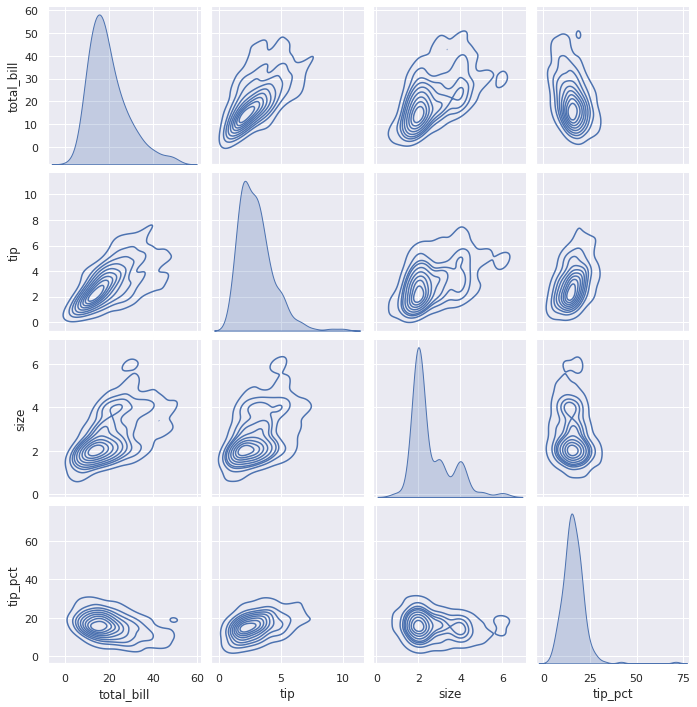

In [21]:
# 도전문제 : pairplot()의 kind 사용하기

sns.pairplot(tips, kind = 'kde')  # kind='hist' 인자를 추가하여 히스토그램 형태?로 만들어주었다. / kind = 'kde'를 이용하여 등고선 형태로 만들어주었다.

<br><br>

---

<br><br>

### 8. Anscombe's quartet 데이터 셋

<br>

Anscombe's quartet 데이터 셋은 1972년 통계학자인 프란시스 앤스컴이 데이터 분석에 앞서 시각화의 중요성과 특이치 값의 영향을 보여주기 위해 만든, 같은 분포를 가지는 네 가지 형태의 데이터의 모음이다.

<br>

In [22]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')  # 데이터 셋 로딩
print(anscombe.head())  # 데이터 셋의 유형과 x, y값으로 표현되는 간단한 데이터임을 알 수 있다.

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


lmplot() 함수를 이용하여 데이터를 시각화하고 선형 회귀 직선을 구할 수 있다.
<br><br>
lmplot()은 regplot과 유사한 선형 회귀 직선을 구하는 기능과 함께 FaceGrid(격자 간격)를 생성하는 인터페이스를 결합한 함수이다.

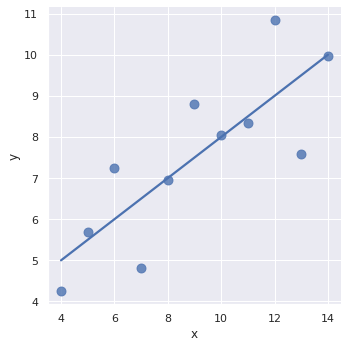

In [26]:
sns.lmplot(x = 'x', y = 'y', data = anscombe.query("dataset == 'I'"), ci = None, scatter_kws = {"s": 80})  # data = anscombe.query("dataset == 'I'")는 첫 번째 타입의 데이터 셋을 가져오는 명령이다

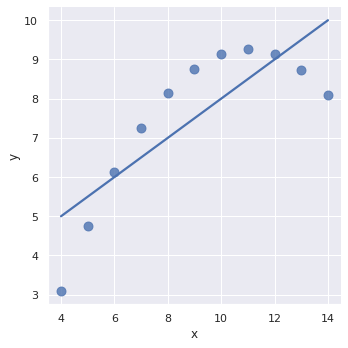

In [27]:
sns.lmplot(x = 'x', y = 'y', data = anscombe.query("dataset == 'II'"), ci = None, scatter_kws = {"s": 80})   # 두 번째 타입의 데이터 셋을 가져와 선형 회귀 직선으로 표현하였다.
# 두 번째 유형의 데이터는 분포가 비선형적인데 이를 직선으로 표현하니 데이터의 분포와 선형 회귀 직선 사이에 차이가 있음을 확인할 수 있다.

<br><br>

---

<br><br>

### 9. 비선형 함수를 사용하여 데이터 설명

<br>

비선형적인 데이터의 분포를 선형 회귀 직선으로 나타내어 보니 데이터의 분포와 직선이 일치하지 않는 문제점이 있었다.
<br><br>
lmplot() 함수에서 order=2를 이용하면 이전과 달리 2차 함수 형태의 곡선이 나타나 데이터를 따라 이동하는 것을 볼 수 있다.

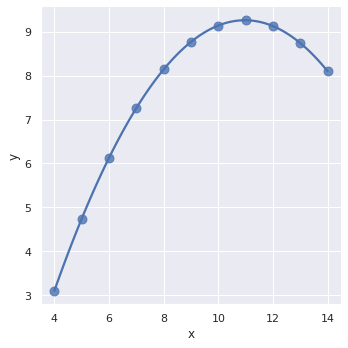

In [28]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), order = 2, ci = None, scatter_kws = {"s": 80})

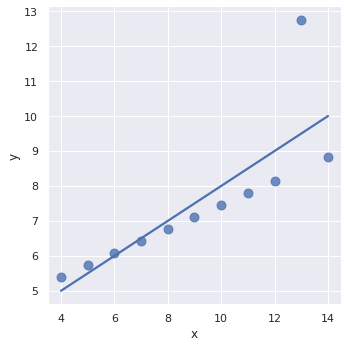

In [29]:
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"), ci = None, scatter_kws = {"s": 80})  # 세 번째 유형의 데이터는 이상치가 존재하는 경우이며, 이로 인해 선형 회귀 직선의 형태가 왜곡되는 문제점이 있다.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


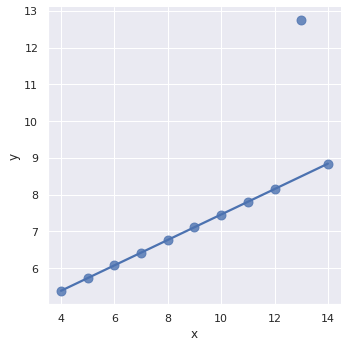

In [30]:
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"), robust = True, ci = None, scatter_kws = {"s": 80})  # robust = True 인자를 이용하여 이상치에 덜 민감한 강건한 모델을 만들 수 있다.

<br><br>

---

<br><br>

### 10. 시본의 또 다른 데이터 셋 : flights 데이터 셋

<br>

In [31]:
import seaborn as sns

flights = sns.load_dataset('flights')  # 데이터 셋 로딩
flights.shape  # 데이터의 형상 출력. 144개의 행과 3개의 열로 이루어진 테이블 데이터임을 알 수 있다.

(144, 3)

In [32]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Figure size 720x216 with 0 Axes>

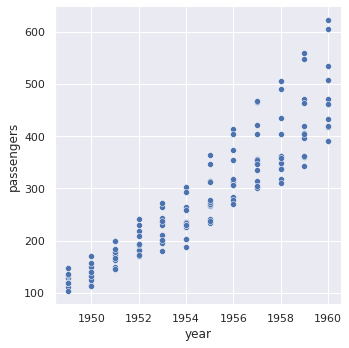

In [33]:
plt.figure(figsize = (10, 3))  # 사이즈 지정
sns.relplot(data = flights, x = "year", y = "passengers")  # x 축은 년도(이산적으로 표시), y 축은 승객의 수를 나타낸다. 매년 비행기 이용자가 꾸준히 증가하는 추세의 그래프.

이산적인 점의 형태로 나타날 때 그래프를 보기 불편할 때가 있는데, 이를 보완하기 위해 relplot(kind = "line")을 이용할 수 있다.
<br><br>
kind = "line"인 경우, 산점도가 아닌 선의 형태로 그려주기 때문에 데이터의 구조 파악에 용이하다.

<Figure size 720x216 with 0 Axes>

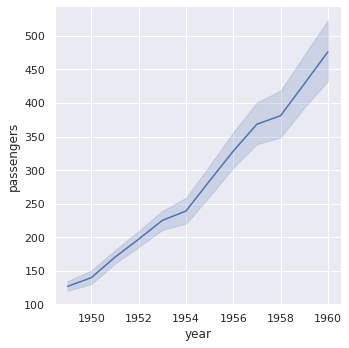

In [34]:
plt.figure(figsize = (10, 3))  # 사이즈 지정
sns.relplot(data = flights, x = "year", y = "passengers", kind = "line")  # 라인 형태로 그림. 증가 형태가 가팔라지다 멈추었다 가팔라지는 모습을 볼 수 있다.